## Actividad Guiada 1 (Extr): DengAI. Predicting Disease Spread - Exploración
### __Nombre:__ Daniel Portugal Revilla

__Objetivo:__ Utilizar técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones a partir de elementos descartables, etc.

__Técnica a utilizar:__ Técnicas de aprendizaje no supervisado de las vistas en la asignatura.

__Tecnología:__ Libre

__Tecnología:__ Para el reto de DengAI se escogió trabajar con Python y sus diversas librerias como:
- Numpy
- pylab
- pandas
- sklearn

Al tener un backgroud de informático, la comodidad y familiaridad de trabajar con python es nativa, así como la ventaja de sus diversas librerías, el poder trabajar en diferentes entornos y plataformas, poder migrar a frameworks como Pyspark con facilidad, etc

### Introducción y definición del problema 
Usando los datos ambientales de las ciudades de San Juan e Iquitos para predecir el número de casos de fiebre del dengue en un lapso de tiempo determinado. Como los mosquitos prosperan en el calor y la humedad climáticos, los países con estas características deberían tener más casos de dengue. El aumento de las precipitaciones también debería contribuir al aumento de los mosquitos y, por lo tanto casos de fiebre del dengue. Con una gran cantidad de datos climáticos y otros factores


In [1]:
#importamos las librerias a utilizar para la exploración y clustering 

import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd

Cargamos el data ser con las características del dengue. creamos un índice compuesto por __city, year,weekofyear__

In [2]:
df = pd.read_csv('./Data/dengue_features_train.csv', encoding='utf-8',index_col=['city', 'year', 'weekofyear'])


In [3]:
df.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

Las estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000
reanalysis_max_air_temp_k,1446.0,303.427109,3.234601,297.800000,301.000000,302.400000,305.500000,314.000000
reanalysis_min_air_temp_k,1446.0,295.719156,2.565364,286.900000,293.900000,296.200000,297.900000,299.900000


transponemos el DataFrame para poder trabajar con las características. eliminamos el campo __'week_start_date'__ para realizar el análisis de las variables numéricas

In [5]:
df_transpose = transpose(df.drop(['week_start_date'], axis = 1))
df_transpose.head()

city                         sj                                            \
year                       1990                                             
weekofyear                   18         19         20         21       22   
ndvi_ne                0.122600   0.169900   0.032250   0.128633  0.19620   
ndvi_nw                0.103725   0.142175   0.172967   0.245067  0.26220   
ndvi_se                0.198483   0.162357   0.157200   0.227557  0.25120   
ndvi_sw                0.177617   0.155486   0.170843   0.235886  0.24734   
precipitation_amt_mm  12.420000  22.820000  34.540000  15.360000  7.52000   

city                                                                        \
year                                                                         
weekofyear                  23        24          25         26         27   
ndvi_ne                    NaN  0.112900    0.072500   0.102450        NaN   
ndvi_nw               0.174850  0.092800    0.072500   0.146175   0.121550   
ndvi_se               0.254314  0.205071    0.151471   0.125571   0.160683   
ndvi_sw               0.181743  0.210271    0.133029   0.123600   0.202567   
precipitation_amt_mm  9.580000  3.480000  151.120000  19.320000  14.410000   

city                  ...         iq                                   \
year                  ...       2010                                    
weekofyear            ...         16         17         18         19   
ndvi_ne               ...   0.231486   0.239743   0.260814   0.168686   
ndvi_nw               ...   0.294686   0.259271   0.255786   0.158500   
ndvi_se               ...   0.331657   0.307786   0.257771   0.133071   
ndvi_sw               ...   0.244400   0.307943   0.340286   0.145600   
precipitation_amt_mm  ...  86.700000  26.000000  73.970000  59.400000   

city                                                                        \
year                                                                         
weekofyear                  20         21         22         23         24   
ndvi_ne               0.263071   0.342750   0.160157   0.247057   0.333914   
ndvi_nw               0.272500   0.318900   0.160371   0.146057   0.245771   
ndvi_se               0.258271   0.256343   0.136043   0.250357   0.278886   
ndvi_sw               0.244500   0.292514   0.225657   0.233714   0.325486   
precipitation_amt_mm  1.150000  55.300000  86.470000  58.940000  59.670000   

city                             
year                             
weekofyear                   25  
ndvi_ne                0.298186  
ndvi_nw                0.232971  
ndvi_se                0.274214  
ndvi_sw                0.315757  
precipitation_amt_mm  63.220000  

[5 rows x 1456 columns]

In [6]:
# dimensionalidad del DataFrame
df_transpose.shape

(20, 1456)

In [7]:
#tipo de dato de las variables
df_transpose.transpose().dtypes

ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm                        float64
dtype: object

Comprobamos si nuestro DataFrame existen valores nulos, si existen procedemos a eliminarlos.

In [8]:
#muestra si hay valores nulos
df_transpose.isnull().values.any()

True

In [9]:
#eliminamos nulos y volvemos a validar
df_transpose = df_transpose.dropna(axis = 1)
df_transpose.isnull().values.any()

False

In [10]:
#calculamos la nueva dimensionalidad
df_transpose.shape

(20, 1199)

### 2. Correlación entre variables
Es necesario identificar aquellas variables que son redundantes, es decir, se puede asumir que representan lo mismo

La Correlación es una técnica estadística usada para determinar la relación entre
dos o más variables.

La correlación puede ser de al menos dos variables o de una variable dependiente
y dos o más variables independientes, denominada correlación múltiple


In [11]:
names = df_transpose.index
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

__Coeficiente de correlación__

El Coeficiente de Correlación es un valor cuantitativo de la relación entre dos o
más variables.
El coeficiente de correlación puede variar desde -1.00 hasta 1.00.

La correlación de proporcionalidad directa o positiva se establece con los valores
+1.00 y de proporcionalidad inversa o negativa, con -1.00. No existe relación entre
las variables cuando el coeficiente es de 0.00.

In [12]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_transpose)
R[1]

array([ 0.84727684,  1.        ,  0.56747819,  0.66096702,  0.21018907,
       -0.32433526, -0.03158167,  0.07665624,  0.61004179, -0.59314073,
        0.20016136,  0.46178041,  0.21018907,  0.11513647,  0.64813794,
        0.20135465,  0.65639237,  0.49722601, -0.30797575,  0.237655  ])

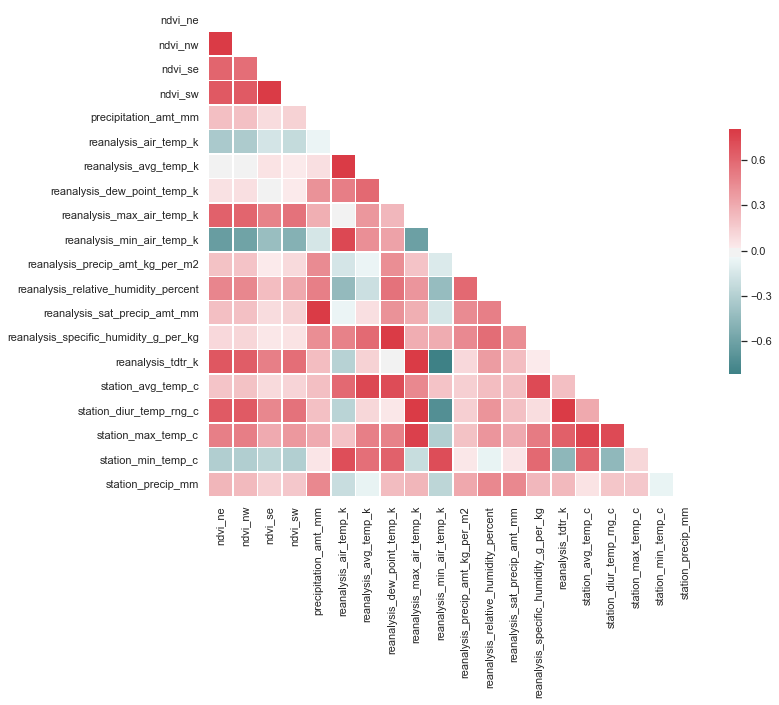

In [13]:
# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, 
            mask=mask, 
            cmap=cmap, 
            vmax=.8,
            square=True, 
            xticklabels=names, 
            yticklabels=names,
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            ax=ax
           )

Se observa correlación entre varias variables, pero no llegan a ser tan significativas, solo para casos puntuales

### Análisis de componentes principales (PCA)

Observar cómo están relacionadas las variables.

es una técnica estadística descriptiva que tiene como punto de partida una matriz de datos con una serie de individuos a los que se les ha medido varias variables. Por eso suele clasificarse como una técnica multivariante.


In [66]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_transpose)


In [15]:
#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.97844003 0.01260983]


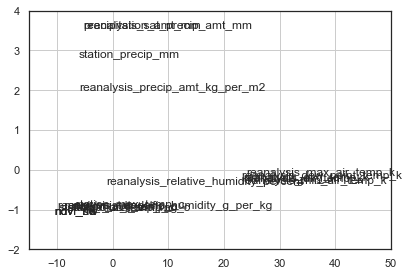

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 

plt.xlim(-15, 50)
plt.ylim(-2, 4)
ax.grid(True)
fig.tight_layout()
plt.show()

El rátio de variabilidad por eje es bueno, con el eje X se representa más del 97% de la variabilidad del conjunto de datos. 

Una vez que hemos verificado que el resultado es fiable podemos ver que muchas de las variables son muy parecidas entre ellas, y sin embargo otras son distintas de las demás y podrían ser las seleccionadas para realizar un clustering posterior.

##  Clustering jerárquico
Dado que tenemos pocos elementos que estudiar podemos utilizar clustering jerárquico para observar las relaciones de similitud entre el desarrollo de las variables. Aquellas grupos de variables que sean similares entre ellas pueden ser resumidas escogiendo una de ellas y de esa forma reduciríamos la dimensionalidad del conjunto de datos.

Para evitar la maldición de la dimensionalidad se puede hacer el clustering con los resultados del análisis de componentes principales, aunque hay que ser precavido ya que aunque reducida, existe perdida de variabilidad en los datos cuando se hace la proyección.

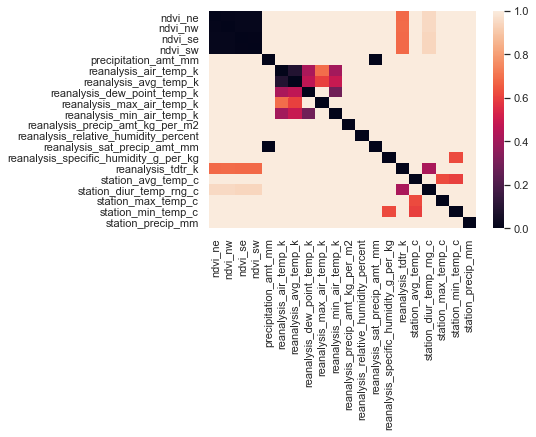

In [20]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist_ft = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist = dist_ft.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

Al graficar la matriz de distancia podemos ver que las variables entre si no son demasiado parecidas,  en un grupo de 5 puntos, los más oscuros.

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


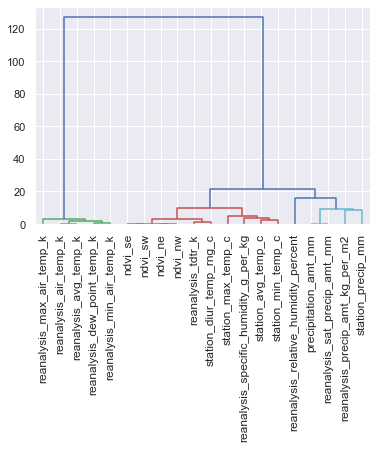

In [22]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'average')

# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 10, labels = names , leaf_rotation=90)
plt.show()

In [23]:
cut = 10 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 3, 4, 3, 2, 2, 2, 2, 2, 2, 3],
      dtype=int32)

Hemos utilizado Single Link con el propósito de aislar rápidamente aquellos elementos que son outliers y que van a ser las características más significativas, en los siguientes casos
- reanalysis_air_temp_k
- reanalysis_max_air_temp_k 
- reanalysis_avg_temp_k
- reanalysis_dew_point_temp_k
- reanalysis_min_air_temp_k



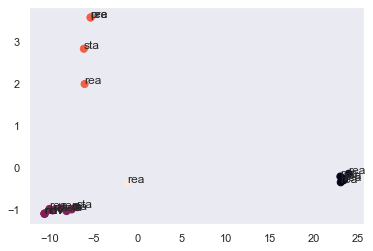

In [25]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.grid()
plt.show()

## DBSCAN
Vamos a identificar elementos outliers mediante la utilización de DBSCAN. El propósito de identificar ouliter es aislar aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.

Vamos a fijar MinPts = 3 y observar que epsilon podemos establecer

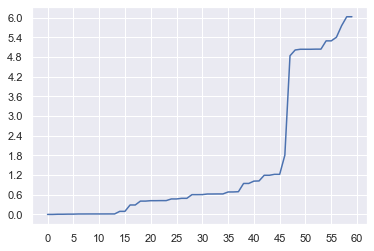

In [26]:
import numpy
minPts=3

from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 80, 5))
ax.set_yticks(numpy.arange(0, 7, 0.6))

plt.plot(seq)


plt.show()

*Vamos* a establecer un rango amplio de pruebas teniendo en cuenta que buscamos aislar elementos diferentes a los demás. 

In [27]:
from sklearn.cluster import DBSCAN

for eps in numpy.arange(0.5, 1.8, 0.2):
  db = DBSCAN(eps, min_samples=minPts).fit(X_pca)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.50, 2, 12
  0.70, 3, 5
  0.90, 3, 5
  1.10, 3, 1
  1.30, 3, 1
  1.50, 3, 1
  1.70, 3, 1


Como podemos observar DBSCAN nos agrupa los elementos en un grupo y el resto son outliers. El número de outliers si es significativo tenerlo en cuenta, por lo que nos vamos a quedar con las parametrizaciones que nos ofrecen un mayor número de outliers.

In [28]:
db = DBSCAN(eps=0.5, min_samples=minPts).fit(X_pca)
labels = db.labels_
labels

array([ 0,  0,  0,  0, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

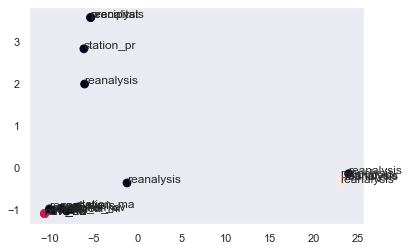

In [29]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=60)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:10]) 
plt.grid()
plt.show()

In [30]:
df_transpose['dbscan_group'] = labels

df_transpose[df_transpose['dbscan_group'] == -1]

city                                           sj                          \
year                                         1990                           
weekofyear                                     18          19          20   
precipitation_amt_mm                    12.420000   22.820000   34.540000   
reanalysis_max_air_temp_k              299.800000  300.900000  300.500000   
reanalysis_precip_amt_kg_per_m2         32.000000   17.940000   26.100000   
reanalysis_relative_humidity_percent    73.365714   77.368571   82.052857   
reanalysis_sat_precip_amt_mm            12.420000   22.820000   34.540000   
reanalysis_specific_humidity_g_per_kg   14.012857   15.372857   16.848571   
reanalysis_tdtr_k                        2.628571    2.371429    2.300000   
station_avg_temp_c                      25.442857   26.714286   26.714286   
station_diur_temp_rng_c                  6.900000    6.371429    6.485714   
station_max_temp_c                      29.400000   31.700000   32.200000   
station_min_temp_c                      20.000000   22.200000   22.800000   
station_precip_mm                       16.000000    8.600000   41.400000   

city                                                                       \
year                                                                        
weekofyear                                     21          22          24   
precipitation_amt_mm                    15.360000    7.520000    3.480000   
reanalysis_max_air_temp_k              301.400000  301.900000  301.300000   
reanalysis_precip_amt_kg_per_m2         13.900000   12.200000   38.600000   
reanalysis_relative_humidity_percent    80.337143   80.460000   82.000000   
reanalysis_sat_precip_amt_mm            15.360000    7.520000    3.480000   
reanalysis_specific_humidity_g_per_kg   16.672857   17.210000   17.234286   
reanalysis_tdtr_k                        2.428571    3.014286    2.042857   
station_avg_temp_c                      27.471429   28.942857   27.414286   
station_diur_temp_rng_c                  6.771429    9.371429    6.771429   
station_max_temp_c                      33.300000   35.000000   32.200000   
station_min_temp_c                      23.300000   23.900000   23.300000   
station_precip_mm                        4.000000    5.800000   29.700000   

city                                                                       \
year                                                                        
weekofyear                                     25          26          28   
precipitation_amt_mm                   151.120000   19.320000   22.270000   
reanalysis_max_air_temp_k              300.600000  302.100000  301.800000   
reanalysis_precip_amt_kg_per_m2         30.000000   37.510000   43.720000   
reanalysis_relative_humidity_percent    83.375714   82.768571   81.467143   
reanalysis_sat_precip_amt_mm           151.120000   19.320000   22.270000   
reanalysis_specific_humidity_g_per_kg   17.977143   17.790000   17.418571   
reanalysis_tdtr_k                        1.571429    1.885714    2.157143   
station_avg_temp_c                      28.371429   28.328571   27.557143   
station_diur_temp_rng_c                  7.685714    7.385714    7.157143   
station_max_temp_c                      33.900000   33.900000   31.700000   
station_min_temp_c                      22.800000   22.800000   21.700000   
station_precip_mm                       21.100000   21.100000   63.700000   

city                                               ...          iq  \
year                                               ...        2010   
weekofyear                                     29  ...          17   
precipitation_amt_mm                    59.170000  ...   26.000000   
reanalysis_max_air_temp_k              302.000000  ...  308.400000   
reanalysis_precip_amt_kg_per_m2         40.900000  ...   23.600000   
reanalysis_relative_humidity_percent    82.144286  ...   87.657143   
reanalysis_sat_precip_amt_mm            59

In [ ]:
bbb

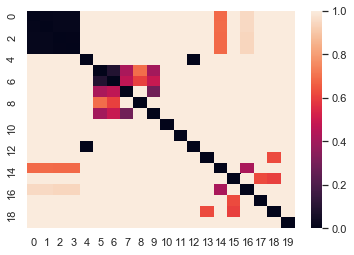

In [31]:
#Hierarchical Clustering
#1. Compute the similarity matrix
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(features_norm)

#1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matsim,vmin=0, vmax=1)

In [32]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

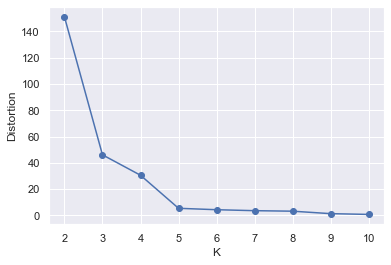

In [34]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

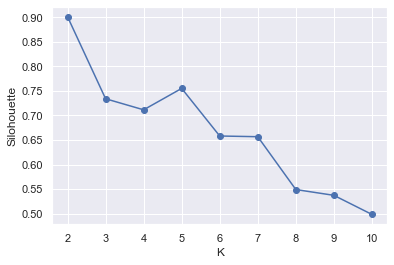

In [35]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

#### Ejecución del Algoritmo

Buscamos alto Silhouette y baja distorción.

Vamos a seleccionar k = 3 con el fin de ejecutar el clustering.

In [62]:
k = 3

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

Vamos a calcular los valores finales de las métricas del algoritmo.

In [63]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(features_norm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.669
Distortion: 46.12


In [64]:
labels_kmeans = km.labels_
labels_kmeans

array([1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

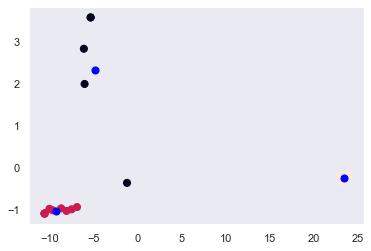

In [65]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
# 
plt.grid()
plt.show()

obtenemos los 3 grupos notables